<div align=center>
		
<font size=5>
In the Name of God
<font/>
<p></p>
<br/>
<br/>
<font color=#FF7500>
Sharif University of Technology - Departmenet of Computer Engineering
</font>
<p></p>
<font color=blue>
Artifical Intelligence - Dr. Mahdieh Soleimani
</font>
<br/>
<br/>
Fall 2022

<hr/>
<font color=red>
Local Search Practical Assignment (30 + 10 points)
</font>
</div>

<ul>
  <li>Some cell's outputs have not been deleted. you can use these to make sure your implementation is correct.</li>
</ul>

In this assignment you will solve the traveling salesman problem using hill climbing, simulated annealing and genetic algorithms.

In [1]:
# do not import other packages for this assignment
import matplotlib.pyplot as plt
import numpy as np

The traveling salesperson problem (TSP) is a touring problem in which each city must be visited exactly once. The aim is to find the shortest tour. The problem is known to be NP-hard, but an enormous amount of effort has been expended to improve the capabilities of TSP algorithms. In addition to planning trips for traveling salespersons, these algorithms have been used for tasks such as planning movements of automatic circuit-board drills and of stocking machines on shop floors.

In this notebook we will use matplotlib library to visualize the problem. we represent each city as a point in a 800*800 rectnagle. the positions of the cities are randomly chosen. run the next codeblock to randomly choose the cities.

In [107]:
WIDTH = 800
HEIGHT = 800
CITY_NUM = 30


class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __repr__(self):
        return f'({self.x},{self.y})'


cities = [City(np.random.randint(10,WIDTH-10),np.random.randint(10,HEIGHT-10)) for i in range(CITY_NUM)] 

The next function helps you visualize the problem.

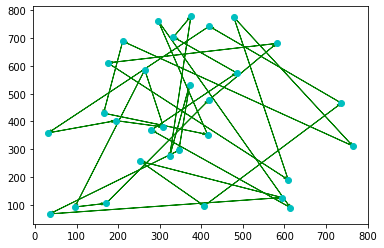

In [108]:
def plotTSP(cities):
    '''
    Inputs:
    - cities : list of cities. ordered by path
    '''
    x = []
    y = []
    for city in cities:
        x.append(city.x)
        y.append(city.y)
    plt.plot(x,y,'co')
    
    a_scale = float(max(x))/float(100)
    plt.arrow(x[-1], y[-1], (x[0] - x[-1]), (y[0] - y[-1]), head_width = a_scale, 
            color ='g', length_includes_head=True)
    for i in range(0,len(x)-1):
        plt.arrow(x[i], y[i], (x[i+1] - x[i]), (y[i+1] - y[i]), head_width = a_scale,
                color = 'g', length_includes_head = True)

plotTSP(cities)

complete the following helper functions. a test cases has been given to you to make sure your implement these functions correctly.

In [109]:
# 5 points

def get_distance_between_two_city(c1 : City, c2 : City):
    '''
    Inputs:
    - c1,c2 : the two cities of type City
    Output: Euclidean distance between them.
    '''
    return np.linalg.norm(np.array([c2.x-c1.x,c2.y-c1.y]))

def get_distance_tsp(cities):
    '''
    Inputs:
    - cities : list of cities of form [c1, c2, ..., cn]. ordered by path
    Output: tsp distance.
    '''
    return sum([get_distance_between_two_city(cities[i],cities[(i+1)%len(cities)]) for i in range(len(cities))])

# testcase
c1 = City(10, 10)
c2 = City(10, 20)
c3 = City(20, 10)
c4 = City(40, 40)
get_distance_tsp([c1,c2,c3,c4])  # should be around 102.62

102.6240552495637

# Algorithm 1 : Hill Climbing (12 points)

implement a hill climbing algorithm for the problem. you dont have to add sideways move to the hill climbing algorithm. meaning that if a neighbor with a smaller path length does not exist you can terminate and return the existing path as the solution. we define a neighbouring solution as changing the place of two cities. for example if our solution is [c1, c2, c3, c4, c5] then one of the possible next solution would be [c4, c2, c3, c1, c5].   
at each timestep generate all the possible next solution and pick the best one. if one does not exist return the current solution.  

* make sure to use the .copy function when you want to have another copy of a list.
* print the the distance at each iteration of hill climbing

iteration0, distance=9700.447810208556
iteration1, distance=8691.548366382784
iteration2, distance=7931.274949164192
iteration3, distance=7285.367314895728
iteration4, distance=6727.95998004885
iteration5, distance=6330.534541908156
iteration6, distance=6000.170827860372
iteration7, distance=5874.220929384744
iteration8, distance=5684.359806486215
iteration9, distance=5582.337943899883
iteration10, distance=5517.596508562309
iteration11, distance=5408.791974698034
iteration12, distance=5316.921695335239
iteration13, distance=5247.657179656304
iteration14, distance=5214.681073711747
iteration15, distance=5185.345128035173
iteration16, distance=5126.959447198229
iteration17, distance=5091.134663774901
iteration18, distance=5082.060274834526
iteration19, distance=5040.393460097313
iteration20, distance=4988.033049438558
iteration21, distance=4971.338249773173
initial path length=11346.56931000363, path length of hill climbing=4971.338249773173


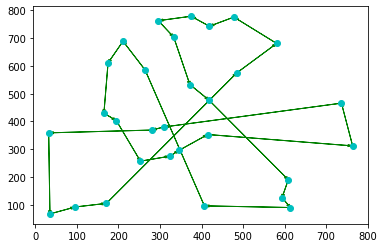

In [110]:
def tsp_hill_climbing(cities):
    '''
    Inputs:
    - cities   : list of cities of form [c1, c2, ..., cn]. ordered by path.
    Output:
    - solution : list of cities of form [c1, c2, ..., cn]. ordered by path.
    '''
    min_path_cost=get_distance_tsp(cities)
    solution=cities
    iteration=0
    while True:
        min_neighbor=None
        min_neighbor_cost=float('inf')
        for i in range(len(solution)):
            for j in range(i+1,len(solution)):
                temp=solution.copy()
                temp[i],temp[j]=temp[j],temp[i]
                score=get_distance_tsp(temp)
                if score<min_neighbor_cost:
                    min_neighbor_cost=score
                    min_neighbor=temp
        if min_neighbor_cost<min_path_cost:
            min_path_cost=min_neighbor_cost
            solution=min_neighbor
        else:
            break
        print(f'iteration{iteration}, distance={min_neighbor_cost}')
        iteration+=1
    return solution
solution = tsp_hill_climbing(cities)
print(f'initial path length={get_distance_tsp(cities)}, path length of hill climbing={get_distance_tsp(solution)}')
plotTSP(solution)

# Algorithm 2: Simulated Annealing (13 points)

In this part we will use simulated annealing to solve the tsp problem. In order to generate a random neighbor of a state. choose two cities at random. then flip a fair coin and do one of the following based on the outcome.  
1 - change the position of the two cities (like algorithm 1)  
2 - reverse the cities between these two cities. example : our initial state is [1,2,3,4,5,6] and the two chosen cities are 2 and 5. the resulting neighbor will be [1,5,4,3,2,6] 
we will use exponential decay as a way to schedule the temparture. meaning that in each iteration the temperature is changed to alpha*temperature.    
at each iteration if the neighbour path length is less than the current state we accept that state as our current state. otherwise we will accept it based on the following probability:  
$$p= {e}^{-\frac{\Delta length}{T}}$$
stop the algorithm when temperature is less than a small number. here we will use the variable stopping_temperature for this.

iteration0, distance=11346.56931000363, T=300
iteration5, distance=11139.384853547106, T=285.29701497
iteration10, distance=11139.384853547106, T=271.3146225026414
iteration15, distance=10755.221746759627, T=258.01750639238657
iteration20, distance=10719.075510915944, T=245.37208127916927
iteration25, distance=10011.161203622492, T=233.346407819744
iteration30, distance=9394.517783574123, T=221.9101120164841
iteration35, distance=8835.841411460344, T=211.0343084998708
iteration40, distance=8581.650614219549, T=200.69152757090413
iteration45, distance=8581.650614219547, T=190.8556458191613
iteration50, distance=8450.043636585404, T=181.5018201412609
iteration55, distance=8437.521819408004, T=172.60642499307855
iteration60, distance=8437.521819408004, T=164.14699271722836
iteration65, distance=8333.65870459426, T=156.1021567950919
iteration70, distance=8184.035958922787, T=148.45159788006208
iteration75, distance=8162.392326420778, T=141.17599247569495
iteration80, distance=8162.39232642

iteration1035, distance=4068.7903393540123, T=0.009110614344385006
iteration1040, distance=4068.7903393540123, T=0.008664103589986354
iteration1045, distance=4068.7903393540123, T=0.008239476305379892
iteration1050, distance=4068.7903393540123, T=0.00783565998280309
iteration1055, distance=4068.7903393540123, T=0.007451634678045343
iteration1060, distance=4068.7903393540123, T=0.007086430434310911
iteration1065, distance=4068.7903393540123, T=0.006739124832338212
iteration1070, distance=4068.7903393540123, T=0.006408840660587646
iteration1075, distance=4068.7903393540123, T=0.006094743699613393
iteration1080, distance=4068.7903393540123, T=0.00579604061502305
iteration1085, distance=4068.7903393540123, T=0.005511976953703197
iteration1090, distance=4068.7903393540123, T=0.005241835238249853
iteration1095, distance=4068.7903393540123, T=0.004984933154790806
iteration1100, distance=4068.7903393540123, T=0.004740621829622672
iteration1105, distance=4068.7903393540123, T=0.0045082841903098

iteration2045, distance=3931.547206790942, T=3.5570847011380767e-07
iteration2050, distance=3931.547206790942, T=3.382752157433826e-07
iteration2055, distance=3931.547206790942, T=3.216963642997327e-07
iteration2060, distance=3931.547206790942, T=3.059300415380514e-07
iteration2065, distance=3931.547206790942, T=2.909364254681805e-07
iteration2070, distance=3931.547206790942, T=2.7667764577371255e-07
iteration2075, distance=3931.547206790942, T=2.6311768816055744e-07
iteration2080, distance=3931.547206790942, T=2.502223033933812e-07
iteration2085, distance=3931.547206790942, T=2.379589207901645e-07
iteration2090, distance=3931.547206790942, T=2.2629656595638867e-07
iteration2095, distance=3931.547206790942, T=2.1520578255106468e-07
iteration2100, distance=3931.547206790942, T=2.0465855788700553e-07
iteration2105, distance=3931.547206790942, T=1.9462825217742543e-07
iteration2110, distance=3931.547206790942, T=1.850895312501596e-07
iteration2115, distance=3931.547206790942, T=1.76018302

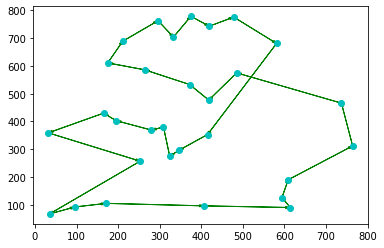

In [111]:
def get_neighbour_state(cities):
    '''
    Inputs:
    - cities    : list of cities of form [c1, c2, ..., cn]. ordered by path.
    Output:
    - neighbour : list of cities of form [c1, c2, ..., cn]. ordered by path.
                  find this neighbour based on the information above.
    '''
    indexes=np.sort(np.random.choice(list(range(len(cities))),2,replace=False))
    coin=np.random.binomial(1,p=0.5)
    if coin==0:
        neighbour=cities.copy()
        neighbour[indexes[0]],neighbour[indexes[1]]=neighbour[indexes[1]],neighbour[indexes[0]]
        return neighbour
    else:
        neighbour=cities.copy()
        neighbour=neighbour[:indexes[0]]+list(reversed(neighbour[indexes[0]:indexes[1]+1]))+neighbour[indexes[1]+1:]
        return neighbour
        
         
def simulated_annealing(cities, T=300, alpha=0.99, stopping_temperature=1e-8):
    '''
    Inputs:
    - cities               : list of cities of form [c1, c2, ..., cn]. ordered by path.
    - T                    : the temperature value of simulated annealing.
    - alpha                : exponential decay factor for T.
    - stopping_temparature : stop the alogorithm if T drops below this.
    Output:
    - solution             : list of cities of form [c1, c2, ..., cn]. ordered by path.
    '''
    min_path_cost=get_distance_tsp(cities)
    solution=cities
    iteration=0
    while T>=stopping_temperature:
        neighbour=get_neighbour_state(solution)
        neighbour_cost=get_distance_tsp(neighbour)
        if neighbour_cost<min_path_cost:
            min_path_cost=neighbour_cost
            solution=neighbour
        elif np.random.uniform(0,100)<=np.e**(-(neighbour_cost-min_path_cost)/T):
            min_path_cost=neighbour_cost
            solution=neighbour
        if (iteration%5==0):
            print(f'iteration{iteration}, distance={min_path_cost}, T={T}')
        iteration+=1
        T=T*alpha
    return solution

solution = simulated_annealing(cities)
print(f'initial path length={get_distance_tsp(cities)}, path length of hill climbing={get_distance_tsp(solution)}')
plotTSP(solution)

# Algorithm 3: genetic algorithm (optional 10 points)

This part is optional and you can earn up to 10 extra point from it. In the theoretical part of this assignment, you created a genetic algorithm for the TSP problem. implement you algotihm here and plot the solution at the end.

In [112]:
class GeneticTSP:
    def __init__(self,population_size=10,generations=1000,tournament_size=8,mutation_rate=0.3):
        self.population_size=population_size
        self.generations=generations
        self.tournament_size=tournament_size
        self.mutation_rate=mutation_rate
    def optimize(self,cities):
        population=self.make_population(cities)
        for gen in range(self.generations):
            new_population=[]
            fitness=self.compute_fitness(population)
            fittest=np.argmin(fitness)
            if gen%50==0:
                print(f'Generation:{gen}')
                print(f'Fitness:{fitness}')
            for i in range(self.population_size):
                parent1=self.tournament_selection(population)
                parent2=self.tournament_selection(population)
                offspring=self.mutate(self.crossover(parent1,parent2))
                new_population.append(offspring)
            population=new_population
        fitness=self.compute_fitness(population)
        return population[np.argmin(fitness)]
        
    def compute_fitness(self,population):
        return [get_distance_tsp(path) for path in population]
    def crossover(self,parent1,parent2):
        start_index,end_index=np.sort(np.random.choice(list(range(len(parent1))),2,replace=False))
        offspring=[None]*len(parent1)
        offspring[start_index:end_index+1]=parent1[start_index:end_index+1]
        offspring_available_index=list(range(0,start_index))+list(range(end_index+1,len(parent1)))
        for city in parent2:
            if city not in offspring:
                offspring[offspring_available_index.pop(0)]=city
#         print(offspring)
#         print('end')
#         return ''
        return offspring
    def mutate(self,offspring):
        if np.random.random()<self.mutation_rate:
            i,j=np.random.choice(list(range(len(offspring))),2,replace=False)
            offspring[i],offspring[j]=offspring[j],offspring[i]
        return offspring
    def tournament_selection(self,population):
        tournament=np.array(population)[np.random.randint(0,len(population),self.tournament_size)]
        tournament_fitness=self.compute_fitness(tournament)
        return tournament[np.argmin(tournament_fitness)]
    def make_population(self, cities):
        return [np.random.permutation(cities) for i in range(self.population_size)]

Generation:0
Fitness:[11778.444624235754, 10012.547408146344, 11706.869055065712, 12151.614564994361, 12668.72664330463, 10962.53939574989, 11317.837651706379, 11289.954714059848, 10785.005459185777, 12510.673125718362]
Generation:50
Fitness:[6568.630650046807, 6500.917707221466, 6500.917707221466, 6687.215562298148, 6977.983157238263, 6500.917707221466, 6568.630650046807, 7984.212920978487, 6500.917707221466, 6500.917707221466]
Generation:100
Fitness:[5869.830107336253, 5873.727569424127, 5869.830107336253, 6752.351719355161, 5869.830107336253, 7698.369530098434, 5869.830107336253, 5869.830107336253, 5869.830107336253, 5869.830107336253]
Generation:150
Fitness:[5489.026761517302, 5489.026761517302, 5489.026761517302, 5489.026761517302, 5146.680426895907, 5489.026761517302, 5489.026761517302, 5489.026761517302, 5489.026761517302, 5489.026761517302]
Generation:200
Fitness:[4713.241365411275, 4775.604042136806, 6407.9035735036805, 4713.241365411275, 4713.241365411275, 4713.241365411275, 

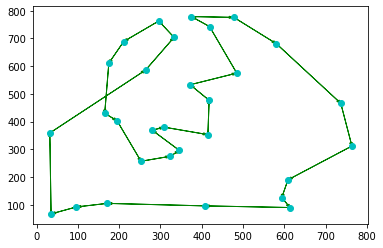

In [113]:
genetic_tsp=GeneticTSP()
solution=genetic_tsp.optimize(cities)
print(f'initial path length={get_distance_tsp(cities)}, path length of hill climbing={get_distance_tsp(solution)}')
plotTSP(solution)